In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [98]:
tesla = pd.read_csv('C:/Users/KIIT/Programs/Projects/Stock Market/tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Volume
0,03/26/2024,178.58,184.25,177.38,177.67,"113,186,203"
1,03/25/2024,168.76,175.24,168.73,172.63,"74,228,625"
2,03/22/2024,166.69,171.20,166.30,170.83,"75,580,641"
3,03/21/2024,176.39,178.18,171.80,172.82,"73,178,008"
4,03/20/2024,173.00,176.25,170.82,175.66,"83,846,727"


In [99]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    252 non-null    object 
 1   Open    252 non-null    float64
 2   High    252 non-null    float64
 3   Low     252 non-null    float64
 4   Close   252 non-null    float64
 5   Volume  252 non-null    object 
dtypes: float64(4), object(2)
memory usage: 11.9+ KB


In [100]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

In [101]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}') 
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2023-03-27 00:00:00 2024-03-26 00:00:00
Total days = 365 days


In [102]:
tesla.describe()

,Date,Open,High,Low,Close
count,252,252.000000,252.000000,252.000000,252.000000
mean,2023-09-24 20:11:25.714285824,222.533294,226.698690,218.256706,222.591270
min,2023-03-27 00:00:00,152.640000,160.480000,152.370000,153.750000
25%,2023-06-26 18:00:00,189.565000,192.990000,185.542500,188.867500
50%,2023-09-25 12:00:00,229.955000,235.365000,225.960000,232.120000
75%,2023-12-23 00:00:00,251.562500,257.977500,247.325000,252.700000
max,2024-03-26 00:00:00,296.040000,299.290000,289.520000,293.340000
std,NaN,35.280256,35.751583,34.732576,35.246292


<Axes: >

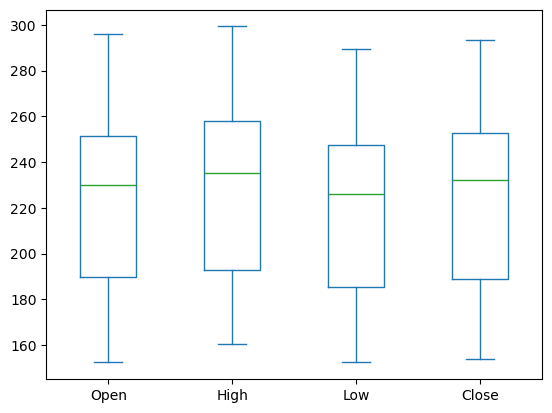

In [103]:
tesla[['Open','High','Low','Close']].plot(kind='box')

In [ ]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

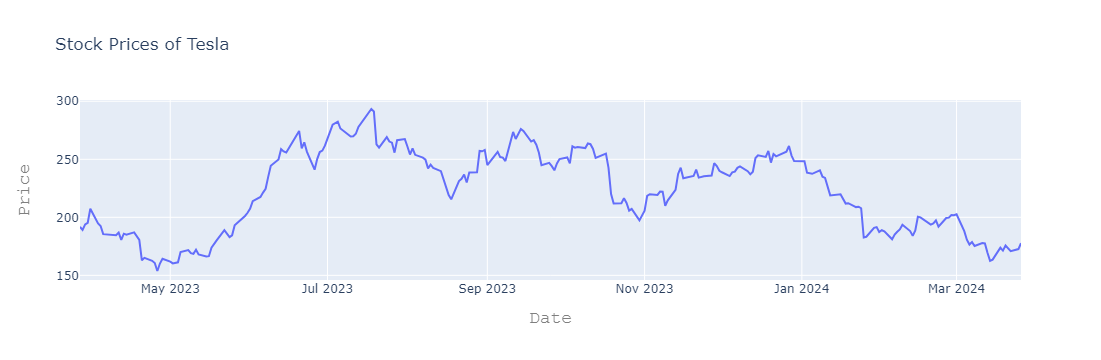

In [105]:
#plot(plot) #plotting offline
iplot(plot)

In [106]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [107]:
#Split the data into train and test sets
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [108]:
# Feature scaling
scaler = StandardScaler().fit(X_train)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [111]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

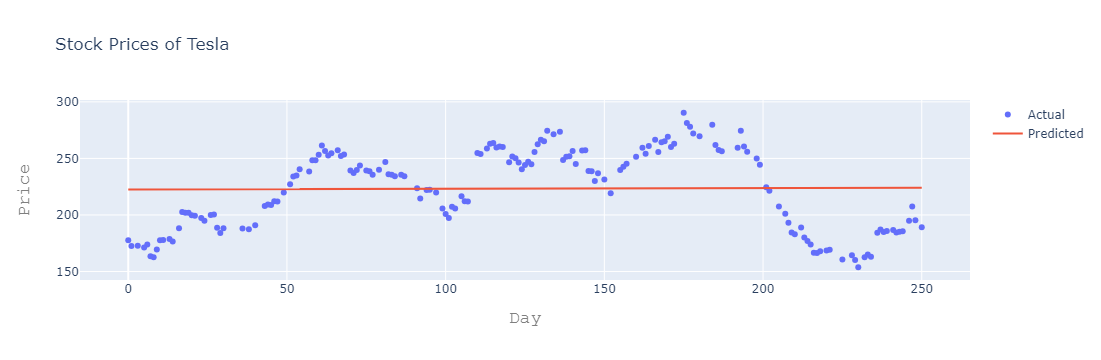

In [112]:
iplot(plot2)

In [113]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.00017444196693783276	-0.0023312321649986423
MSE       1210.1144164679554	1298.8236753353854

